In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from math import *
from tqdm.auto import tqdm
from tqdm.auto import trange
from tqdm.contrib import itertools as ti

matplotlib.rcParams['figure.figsize'] = (20, 10)
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
np.set_printoptions(threshold=30000)

(np.float64(0.9458266715347059),
 np.float64(16.735670400979135),
 np.float64(37.287861906948955))

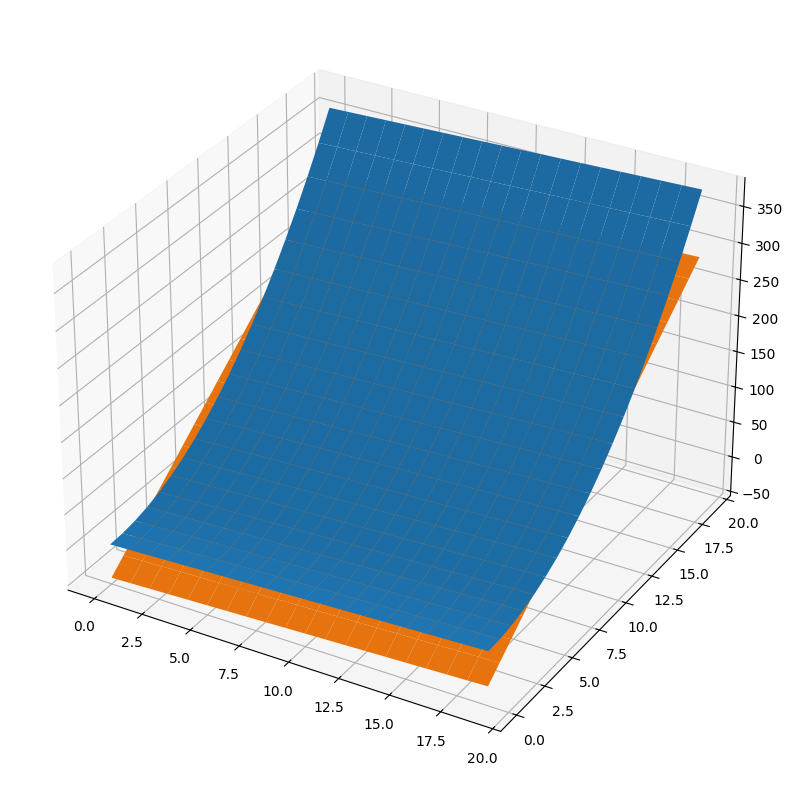

In [86]:
RADIUS = 2
SIDE = 1 + 2 * RADIUS

def make_plane(z, mx, my):
  width, height = z.shape
  total_pixels = width * height

  zmean = z.mean()
  W = np.empty_like(z)
  for xx in range(width):
    for yy in range(height):
      wA = exp(-0.5 * abs(z[xx, yy] - zmean) / zmean)
      wB = exp(-0.5 * ((xx-mx)**2 + (yy-my)**2) / (width * height))
      W[xx, yy] = wA * wB

  zflat, Wflat = z.flatten(), W.flatten()
  coords = np.mgrid[0:width, 0:height]
  mA = np.empty((total_pixels, 3))
  mA[:,0] = Wflat * (coords[1].flatten() - mx)
  mA[:,1] = Wflat * (coords[0].flatten() - my)
  mA[:,2] = Wflat

  mAt = mA.transpose()
  mAtA = np.matmul(mAt, mA)
  mAtb = np.matmul(mAt, Wflat * zflat)
  (A, B, C) = np.linalg.solve(mAtA, mAtb)
  return (A, B, C)

WIDTH = 20
HEIGHT = 20
x, y = np.meshgrid(range(WIDTH), range(HEIGHT))

def surfaces(s):
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  for z in s:
    ax.plot_surface(x, y, z)
  plt.show()

arr = np.array([[np.float64(x + y**2) for x in range(WIDTH)] for y in range(HEIGHT)])
MX = 1
MY = 5
Z = make_plane(arr, MX, MY)
display(Z)
plane = np.array([[(Z[0] * (x - MX) + Z[1] * (y - MY) + Z[2]) for x in range(20)] for y in range(20)])

surfaces([arr, plane])